In [27]:
# Use decision trees to prepare a model on fraud data 
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

# Data Description :

# Undergrad : person is under graduated or not
# Marital.Status : marital status of a person
# Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
# Work Experience : Work experience of an individual person
# Urban : Whether that person belongs to urban area or not




In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#for encoding
LE=LabelEncoder()
from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for decision tree object
from sklearn.tree import plot_tree#for visualizing tree 
import warnings
warnings.filterwarnings("ignore")


In [50]:
df=pd.read_csv("D:/Fraud_check _Random.csv")

In [51]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [52]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [54]:
##Converting the Taxable income variable to bucketing. 
df["income"]=df["Taxable.Income"]
df.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df.loc[df["Taxable.Income"]<=30000,"income"]="Risk"


In [55]:
##Droping the Taxable income variable
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [56]:
df["income"].value_counts()

Good    476
Risk    124
Name: income, dtype: int64

# Data Transformation of Continuous Variable.....

In [57]:
X=[var for var in df.columns if df[var].dtypes!="object"]

In [58]:
df2=df[X]

In [59]:
df2

,City.Population,Work.Experience
0,50047,10
1,134075,18
2,160205,30
3,193264,15
4,27533,28
...,...,...
595,39492,7
596,55369,2
597,154058,0
598,180083,17


In [60]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
df3=SS.fit_transform(df2)
df3=pd.DataFrame(df3)
df3.columns=["City.Population","Work.Experience"]
df3

,City.Population,Work.Experience
0,-1.178521,-0.629143
1,0.508500,0.276370
2,1.033109,1.634639
3,1.696831,-0.063197
4,-1.630532,1.408261
...,...,...
595,-1.390432,-0.968710
596,-1.071672,-1.534655
597,0.909696,-1.761033
598,1.432197,0.163181


In [61]:
categorical=[var for var in df.columns if df[var].dtypes=="object"]

In [62]:
df4=df[categorical]

In [63]:
df4

,Undergrad,Marital.Status,Urban,income
0,NO,Single,YES,Good
1,YES,Divorced,YES,Good
2,NO,Married,YES,Good
3,YES,Single,YES,Good
4,NO,Married,NO,Good
...,...,...,...,...
595,YES,Divorced,YES,Good
596,YES,Divorced,YES,Good
597,NO,Divorced,YES,Good
598,YES,Married,NO,Good


In [64]:
for i in range(0,4):
    df4.iloc[:,i]=LE.fit_transform(df4.iloc[:,i])

In [65]:
df4

,Undergrad,Marital.Status,Urban,income
0,0,2,1,0
1,1,0,1,0
2,0,1,1,0
3,1,2,1,0
4,0,1,0,0
...,...,...,...,...
595,1,0,1,0
596,1,0,1,0
597,0,0,1,0
598,1,1,0,0


In [66]:
df5=pd.concat([df3,df4],axis=1)

In [67]:
df5

,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,income
0,-1.178521,-0.629143,0,2,1,0
1,0.508500,0.276370,1,0,1,0
2,1.033109,1.634639,0,1,1,0
3,1.696831,-0.063197,1,2,1,0
4,-1.630532,1.408261,0,1,0,0
...,...,...,...,...,...,...
595,-1.390432,-0.968710,1,0,1,0
596,-1.071672,-1.534655,1,0,1,0
597,0.909696,-1.761033,0,0,1,0
598,1.432197,0.163181,1,1,0,0


In [68]:
Y=df5["income"]
X=df5.iloc[:,0:5]

In [69]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [70]:
DT.fit(X,Y)

DecisionTreeClassifier()

In [71]:
Y_pred=DT.predict(X)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [72]:
from sklearn.metrics import accuracy_score as ac
ac1=ac(Y,Y_pred)
ac1.round(3)

1.0

In [73]:
from sklearn.tree  import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='gini',max_depth=3)
from sklearn.model_selection import train_test_split
train_Accuracy=[]
test_Accuracy=[]
import numpy as np

In [74]:
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=(i))
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test = DT.predict(X_test)
    train_Accuracy.append(ac(Y_train,Y_pred_train))
    test_Accuracy.append(ac(Y_test,Y_pred_test))

In [75]:
print(train_Accuracy)

[0.7952380952380952, 0.8047619047619048, 0.8095238095238095, 0.7880952380952381, 0.7976190476190477, 0.8285714285714286, 0.8, 0.7928571428571428, 0.8023809523809524, 0.8095238095238095, 0.8023809523809524, 0.780952380952381, 0.7833333333333333, 0.7928571428571428, 0.780952380952381, 0.780952380952381, 0.8095238095238095, 0.8261904761904761, 0.8047619047619048, 0.8071428571428572, 0.7904761904761904, 0.8, 0.7928571428571428, 0.7928571428571428, 0.7976190476190477, 0.8095238095238095, 0.7976190476190477, 0.8142857142857143, 0.8047619047619048, 0.8, 0.7976190476190477, 0.7904761904761904, 0.7976190476190477, 0.7928571428571428, 0.8, 0.8095238095238095, 0.7976190476190477, 0.8023809523809524, 0.8047619047619048, 0.8023809523809524, 0.7976190476190477, 0.8047619047619048, 0.8095238095238095, 0.8166666666666667, 0.7833333333333333, 0.8023809523809524, 0.8071428571428572, 0.7880952380952381, 0.7952380952380952, 0.7976190476190477, 0.8119047619047619, 0.7857142857142857, 0.7785714285714286, 0.

In [76]:
print(test_Accuracy)

[0.8, 0.7888888888888889, 0.7666666666666667, 0.7833333333333333, 0.8055555555555556, 0.7277777777777777, 0.7888888888888889, 0.8, 0.7777777777777778, 0.75, 0.7833333333333333, 0.8388888888888889, 0.8388888888888889, 0.8055555555555556, 0.8333333333333334, 0.85, 0.7666666666666667, 0.7222222222222222, 0.7833333333333333, 0.7611111111111111, 0.7944444444444444, 0.7888888888888889, 0.8111111111111111, 0.8, 0.7888888888888889, 0.7611111111111111, 0.7833333333333333, 0.7333333333333333, 0.7777777777777778, 0.7722222222222223, 0.7833333333333333, 0.8055555555555556, 0.7888888888888889, 0.8166666666666667, 0.7888888888888889, 0.7722222222222223, 0.7833333333333333, 0.7777777777777778, 0.7833333333333333, 0.7777777777777778, 0.7888888888888889, 0.7888888888888889, 0.7666666666666667, 0.7444444444444445, 0.8111111111111111, 0.7833333333333333, 0.7666666666666667, 0.8166666666666667, 0.7888888888888889, 0.7833333333333333, 0.7555555555555555, 0.8055555555555556, 0.8277777777777777, 0.7888888888

In [77]:
print('Training Accuracy - CV: ',np.mean(train_Accuracy).round(2))
print('Test Accuracy - CV: ',np.mean(test_Accuracy).round(2))

Training Accuracy - CV:  0.8
Test Accuracy - CV:  0.79


In [78]:
from sklearn import tree

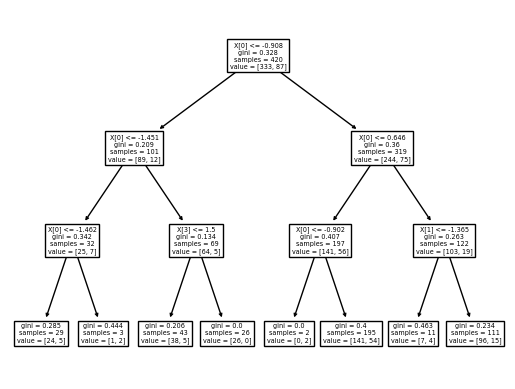

In [79]:
#PLot the decision tree
tree.plot_tree(DT);

In [80]:
########################LETS TRY WITH ENTROPY#################################################################

In [81]:
from sklearn.tree  import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='entropy',max_depth=3)
from sklearn.model_selection import train_test_split
train_Accuracy1=[]
test_Accuracy1=[]
import numpy as np

In [82]:
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=(i))
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test = DT.predict(X_test)
    train_Accuracy1.append(ac(Y_train,Y_pred_train))
    test_Accuracy1.append(ac(Y_test,Y_pred_test))

In [83]:
print(train_Accuracy1)

[0.7928571428571428, 0.8047619047619048, 0.8119047619047619, 0.7857142857142857, 0.7904761904761904, 0.8238095238095238, 0.8, 0.7904761904761904, 0.8023809523809524, 0.8095238095238095, 0.7976190476190477, 0.7857142857142857, 0.7833333333333333, 0.7928571428571428, 0.780952380952381, 0.780952380952381, 0.8071428571428572, 0.8261904761904761, 0.8023809523809524, 0.7976190476190477, 0.7928571428571428, 0.8023809523809524, 0.7928571428571428, 0.7928571428571428, 0.8, 0.8071428571428572, 0.8, 0.8095238095238095, 0.8, 0.7976190476190477, 0.7976190476190477, 0.7952380952380952, 0.7952380952380952, 0.7880952380952381, 0.8, 0.8071428571428572, 0.7976190476190477, 0.8023809523809524, 0.8047619047619048, 0.8047619047619048, 0.7976190476190477, 0.8023809523809524, 0.8047619047619048, 0.8166666666666667, 0.7833333333333333, 0.8023809523809524, 0.8047619047619048, 0.7880952380952381, 0.7952380952380952, 0.7952380952380952, 0.8119047619047619, 0.7833333333333333, 0.7785714285714286, 0.79761904761904

In [84]:
print(test_Accuracy)

[0.8, 0.7888888888888889, 0.7666666666666667, 0.7833333333333333, 0.8055555555555556, 0.7277777777777777, 0.7888888888888889, 0.8, 0.7777777777777778, 0.75, 0.7833333333333333, 0.8388888888888889, 0.8388888888888889, 0.8055555555555556, 0.8333333333333334, 0.85, 0.7666666666666667, 0.7222222222222222, 0.7833333333333333, 0.7611111111111111, 0.7944444444444444, 0.7888888888888889, 0.8111111111111111, 0.8, 0.7888888888888889, 0.7611111111111111, 0.7833333333333333, 0.7333333333333333, 0.7777777777777778, 0.7722222222222223, 0.7833333333333333, 0.8055555555555556, 0.7888888888888889, 0.8166666666666667, 0.7888888888888889, 0.7722222222222223, 0.7833333333333333, 0.7777777777777778, 0.7833333333333333, 0.7777777777777778, 0.7888888888888889, 0.7888888888888889, 0.7666666666666667, 0.7444444444444445, 0.8111111111111111, 0.7833333333333333, 0.7666666666666667, 0.8166666666666667, 0.7888888888888889, 0.7833333333333333, 0.7555555555555555, 0.8055555555555556, 0.8277777777777777, 0.7888888888

In [85]:
print('Training Accuracy - CV: ',np.mean(train_Accuracy1).round(2))
print('Test Accuracy - CV: ',np.mean(test_Accuracy1).round(2))

Training Accuracy - CV:  0.8
Test Accuracy - CV:  0.79


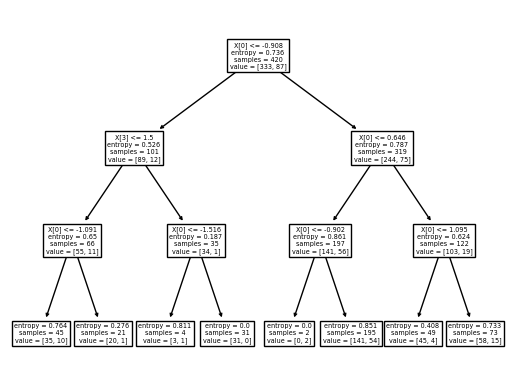

In [86]:
from sklearn import tree
#PLot the decision tree
tree.plot_tree(DT);